# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# Funciones

In [2]:
def hist_chart(df, col, titulo, etiqueta):
    variable = df.groupby(col)[col].count()
    plt.title(titulo)
    plt.plot(variable.index, variable.values, label=etiqueta)
    plt.legend()
    plt.grid()
    plt.show()

def pareto_chart(df, col):
    fig, ax = plt.subplots(figsize=(15,5))
    plt.title(f"Distribución por {col}")
    plt.xticks(rotation=90)
    ax.bar(df[col].value_counts().index, df[col].value_counts().values)
    ax2 = ax.twinx()
    ax2.plot(df[col].value_counts().index, df[col].value_counts().cumsum() / df.shape[0])
    ax2.axhline(0.8, color = 'r')
    plt.show()

def get_periodo_dia(x):
    if 5 <= x < 12:
        return "mañana"
    elif 12 <= x < 19:
        return "tarde"
    else:
        return "noche"

# Cargar el Dataset

In [3]:
data = pd.read_csv('dataset_SCL.csv')
display(data.head(5))

/var/folders/zw/b42_qgc508n15bfdt_vh4d040000gn/T/ipykernel_1040/4151164970.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
# Formatear datos de fecha

data["Fecha-I"] = data["Fecha-I"].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
data["Fecha-O"] = data["Fecha-O"].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

In [5]:
# Calcular dia, mes, año, day of week, hora a partir de las fechas

data["DIA-I"] = data["Fecha-I"].dt.day
data["MES-I"] = data["Fecha-I"].dt.month
data["AÑO-I"] = data["Fecha-I"].dt.year
data["DOW-I"] = data["Fecha-I"].dt.weekday + 1 # Lunes es 1, domingo es 7
data["Hour-I"] = data["Fecha-I"].dt.hour
data["WEEKOFYEAR-I"] = data["Fecha-I"].dt.isocalendar().week # Week Of Year


data["DIA-O"] = data["Fecha-O"].dt.day
data["MES-O"] = data["Fecha-O"].dt.month
data["AÑO-O"] = data["Fecha-O"].dt.year
data["DOW-O"] = data["Fecha-O"].dt.weekday + 1 # Lunes es 1, domingo es 7
data["Hour-O"] = data["Fecha-O"].dt.hour
data["WEEKOFYEAR-O"] = data["Fecha-O"].dt.isocalendar().week # Week Of Year

# P1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [6]:
print(f'Cantidad de vuelos: {data.shape[0]}')

Cantidad de vuelos: 68206


In [7]:
print(f'Total de valores NA: {data.isna().sum().sum()}')

Total de valores NA: 1


In [8]:
# Ya que solo hay 1 valor nulo, se eliminará
data = data.dropna()

In [9]:
print(f'Años de operacion: {data["AÑO"].unique()}')

print(f'Ciudades de origen: {data["Ori-I"].nunique()}')

print(f'Ciudades de destino: {data["Des-I"].nunique()}')

print(f'Cantidad de aerolíneas: {data["Emp-I"].nunique()}')

Años de operacion: [2017 2018]
Ciudades de origen: 1
Ciudades de destino: 64
Cantidad de aerolíneas: 30


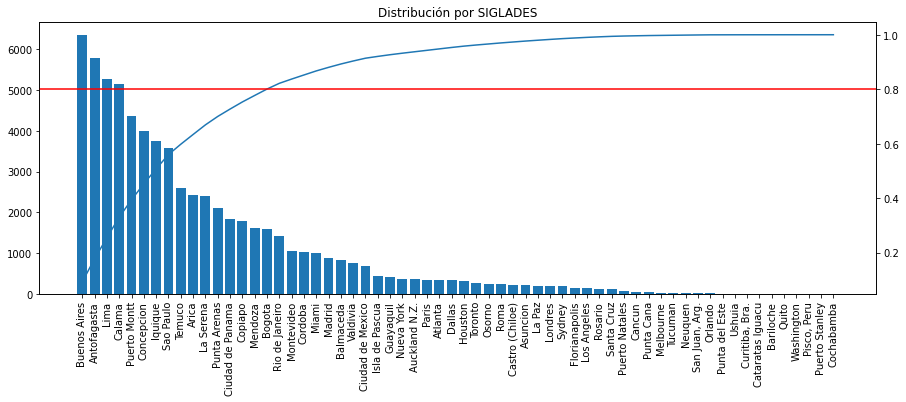

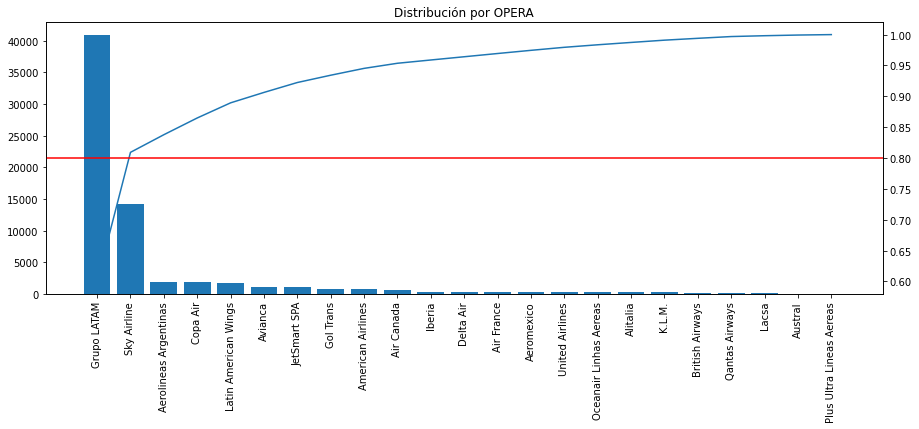

In [10]:
pareto_chart(data, 'SIGLADES')
pareto_chart(data, 'OPERA')

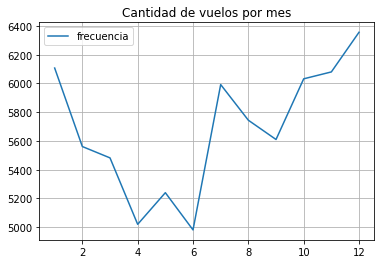

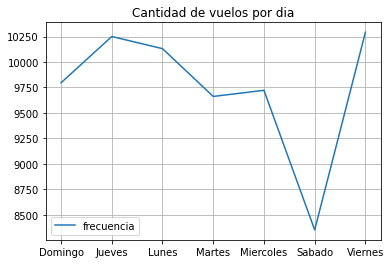

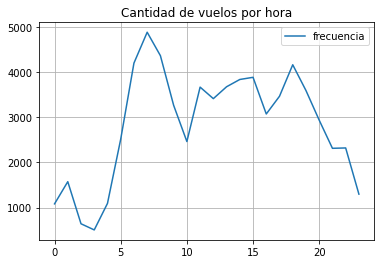

In [11]:
hist_chart(data, 'MES', 'Cantidad de vuelos por mes', 'frecuencia')
hist_chart(data, 'DIANOM', 'Cantidad de vuelos por dia', 'frecuencia')
hist_chart(data, 'Hour-I', 'Cantidad de vuelos por hora', 'frecuencia')

# P2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

In [12]:
data["temporada_alta"] =  (("2016-12-15" <= data["Fecha-I"]) & (data["Fecha-I"] <= "2017-03-03")) | \
                        (("2017-07-15" <= data["Fecha-I"]) & (data["Fecha-I"] <= "2017-07-31")) | \
                        (("2017-09-11" <= data["Fecha-I"]) & (data["Fecha-I"] <= "2017-09-30")) | \
                        (("2017-12-15" <= data["Fecha-I"]) & (data["Fecha-I"] <= "2018-03-03"))

data["temporada_alta"] = data["temporada_alta"].astype(int)

data["diff_min"] = (data["Fecha-O"] - data["Fecha-I"]).dt.seconds / 60
data["atraso_15"] = (data["diff_min"] > 15).astype(int)
data["periodo_dia"] = data["Hour-I"].apply(lambda x: get_periodo_dia(x))

data.to_csv("syntehtic_features.csv", index=False, sep="|")

# P3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [ ]:
asdfadf